# How many genes per TAD are in Azucena?

In [2]:
#genes
wc -l /scratch/ak8725/az_mrg/azucena_genes.bed

36879 /scratch/ak8725/az_mrg/azucena_genes.bed


In [5]:
#1kb HiCExplorer TADs
wc -l /scratch/ak8725/az_mrg/hicexplorer_1kb_tads.bed

4650 /scratch/ak8725/az_mrg/hicexplorer_1kb_tads.bed


In [7]:
#2kb HiCExplorer TADs
wc -l /scratch/ak8725/az_mrg/hicFindTADs/hicFindTADs1_out/az_mrg1_domains.bed

6420 /scratch/ak8725/az_mrg/hicFindTADs/hicFindTADs1_out/az_mrg1_domains.bed


In [10]:
#5kb HiCExplorer TADs - 3954 TADs
/scratch/ak8725/az_mrg/hicFindTADs/hicFindTADs13_out/hicexplorer_az_tads_5kb.bed

bash: /scratch/ak8725/az_mrg/hicFindTADs/hicFindTADs13_out/hicexplorer_az_tads_5kb.bed: Permission denied


: 126

In [11]:
#2kb two tools TADs
wc -l /scratch/ak8725/az_mrg/TADs_2kb_two_tools_intersect_80.bed

2474 /scratch/ak8725/az_mrg/TADs_2kb_two_tools_intersect_80.bed


In [12]:
#5kb two tools TADs - 1207 TADs
/scratch/ak8725/az_mrg/TADs_5kb_two_tools_intersect_80.bed

bash: /scratch/ak8725/az_mrg/TADs_5kb_two_tools_intersect_80.bed: Permission denied


: 126

In [2]:
module load bedtools/intel/2.29.2

# 1kb HiCExplorer TADs

In [5]:
#Gene is considered within a TAD, if 80% is inside
bedtools intersect -a /scratch/ak8725/az_mrg/hicFindTADs/hicFindTADs1_out/az_2kb_domains.bed -b /scratch/ak8725/annotations/az_genes6.bed -F 0.8 -wo \
> genes_in_2kb_two_tads.bed

***** WARNING: File /scratch/ak8725/annotations/az_genes6.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	37926	50143	OsAzu_10g0000010	1	-

***** WARNING: File /scratch/ak8725/annotations/az_genes6.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	37926	50143	OsAzu_10g0000010	1	-



In [5]:
wc -l genes_in_5kb_two_tads.bed

9449 genes_in_5kb_two_tads.bed


In [7]:
bedtools groupby -g 1,2,3 -c 7 -o count -i genes_in_2kb_two_tads.bed > number_genes_per_2kb_two_tad.bed

In [9]:
wc -l number_genes_per_2kb_two_tad.bed

6238 number_genes_per_2kb_two_tad.bed


In [1]:
import numpy as np

# Read in the BED file
bed_file = np.genfromtxt('number_genes_per_5kb_two_tad.bed', dtype=int)

# Get the 4th column (0-indexed)
column_4 = bed_file[:, 3]

# Calculate min, median, and max using NumPy functions
min_value = np.min(column_4)
median_value = np.median(column_4)
max_value = np.max(column_4)
quartiles = np.quantile(column_4, [0,0.25,0.5,0.75,1])
print(quartiles)

# Print the results
print("Min value:", min_value)
print("Median value:", median_value)
print("Max value:", max_value)

[ 1.  5.  7. 10. 38.]
Min value: 1
Median value: 7.0
Max value: 38


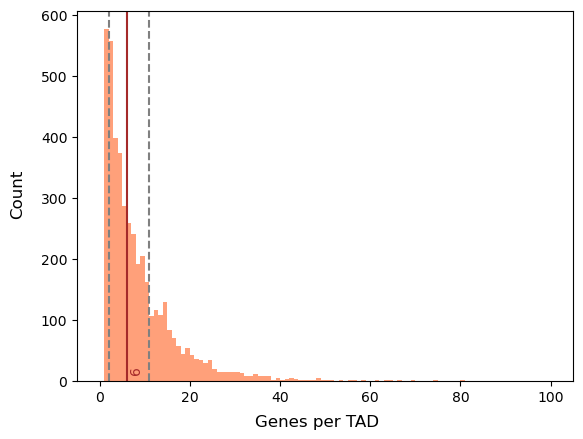

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Read in the BED file
bed_file = np.genfromtxt('number_genes_per_1kb_tad.bed', dtype=int)

# Get the 4th column (0-indexed)
column_4 = bed_file[:, 3]

#sns.set(style="whitegrid") 

fig, ax = plt.subplots(nrows=1, ncols=1)

ax=plt.subplot(1, 1, 1,)
plt.hist(column_4, bins=100, range=[0,100], color='lightsalmon')
#plt.title('HiCExplorer TADs size distribution', size=14)
plt.axvline(x=6, color='brown')
plt.text(6.5, 15, "6", rotation=90, color='brown', size=10)
#plt.text(25000, 12, "22000", rotation=90, color='gray', size=10)
#plt.text(107000, 12, "104000", rotation=90, color='gray', size=10)
plt.axvline(x=2, color='gray', linestyle='--')
plt.axvline(x=11, color='gray', linestyle='--')
#plt.axvline(x=104000, color='gray', linestyle='--')
#plt.axvline(x=1614000, color='gray', linestyle='--')

fig.supylabel('Count',size=12)
fig.supxlabel('Genes per TAD',size=12)
#plt.savefig('TAD_2_tools_intersect_sizes.png')
plt.show()

# 2kb HiCExplorer TADs

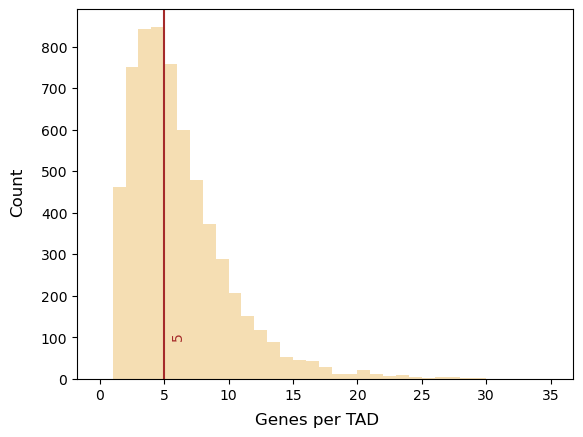

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Read in the BED file
bed_file = np.genfromtxt('number_genes_per_2kb_hicexp_tad.bed', dtype=int)

# Get the 4th column (0-indexed)
column_4 = bed_file[:, 3]

#sns.set(style="whitegrid") 

fig, ax = plt.subplots(nrows=1, ncols=1)

ax=plt.subplot(1, 1, 1,)
plt.hist(column_4, bins=35, range=[0,35], color='wheat')
#plt.title('HiCExplorer TADs size distribution', size=14)
plt.axvline(x=5, color='brown')
plt.text(5.5, 100, "5", rotation=90, color='brown', size=10)
#plt.text(25000, 12, "22000", rotation=90, color='gray', size=10)
#plt.text(107000, 12, "104000", rotation=90, color='gray', size=10)
#plt.axvline(x=3, color='gray', linestyle='--')
#plt.axvline(x=7, color='gray', linestyle='--')
#plt.axvline(x=104000, color='gray', linestyle='--')
#plt.axvline(x=1614000, color='gray', linestyle='--')

fig.supylabel('Count',size=12)
fig.supxlabel('Genes per TAD',size=12)
plt.title('2kb resolution')
#plt.savefig('/scratch/ak8725/figs/fig2G.pdf')
plt.show()

# 5kb HiCExplorer TADs

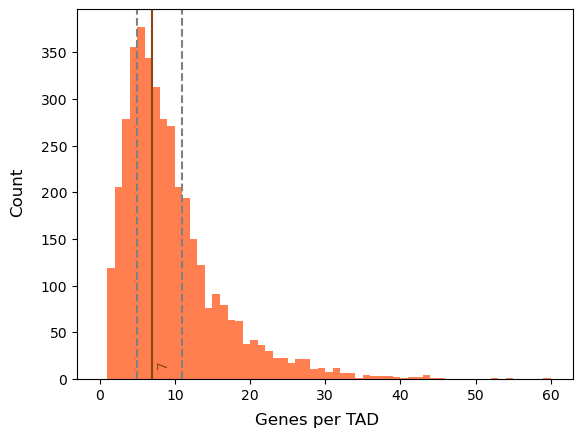

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Read in the BED file
bed_file = np.genfromtxt('number_genes_per_5kb_hicexp_tad.bed', dtype=int)

# Get the 4th column (0-indexed)
column_4 = bed_file[:, 3]

#sns.set(style="whitegrid") 

fig, ax = plt.subplots(nrows=1, ncols=1)

ax=plt.subplot(1, 1, 1,)
plt.hist(column_4, bins=60, range=[0,60], color='coral')
#plt.title('HiCExplorer TADs size distribution', size=14)
plt.axvline(x=7, color='saddlebrown')
plt.text(7.5, 15, "7", rotation=90, color='saddlebrown', size=10)
#plt.text(25000, 12, "22000", rotation=90, color='gray', size=10)
#plt.text(107000, 12, "104000", rotation=90, color='gray', size=10)
plt.axvline(x=5, color='gray', linestyle='--')
plt.axvline(x=11, color='gray', linestyle='--')
#plt.axvline(x=104000, color='gray', linestyle='--')
#plt.axvline(x=1614000, color='gray', linestyle='--')

fig.supylabel('Count',size=12)
fig.supxlabel('Genes per TAD',size=12)
#plt.savefig('TAD_2_tools_intersect_sizes.png')
plt.show()

# 2kb two tools TADs

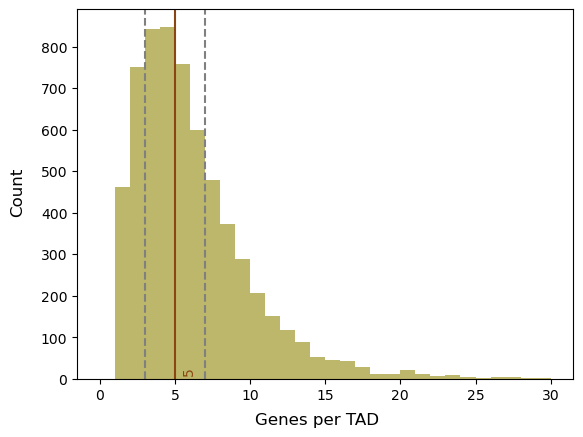

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Read in the BED file
bed_file = np.genfromtxt('number_genes_per_2kb_two_tad.bed', dtype=int)

# Get the 4th column (0-indexed)
column_4 = bed_file[:, 3]

#sns.set(style="whitegrid") 

fig, ax = plt.subplots(nrows=1, ncols=1)

ax=plt.subplot(1, 1, 1,)
plt.hist(column_4, bins=30, range=[0,30], color='darkkhaki')
#plt.title('HiCExplorer TADs size distribution', size=14)
plt.axvline(x=5, color='saddlebrown')
plt.text(5.5, 15, "5", rotation=90, color='saddlebrown', size=10)
#plt.text(25000, 12, "22000", rotation=90, color='gray', size=10)
#plt.text(107000, 12, "104000", rotation=90, color='gray', size=10)
plt.axvline(x=3, color='gray', linestyle='--')
plt.axvline(x=7, color='gray', linestyle='--')
#plt.axvline(x=104000, color='gray', linestyle='--')
#plt.axvline(x=1614000, color='gray', linestyle='--')

fig.supylabel('Count',size=12)
fig.supxlabel('Genes per TAD',size=12)
plt.savefig('/scratch/ak8725/figs/fig2G.pdf')
plt.show()

# 5kb two tools TADs

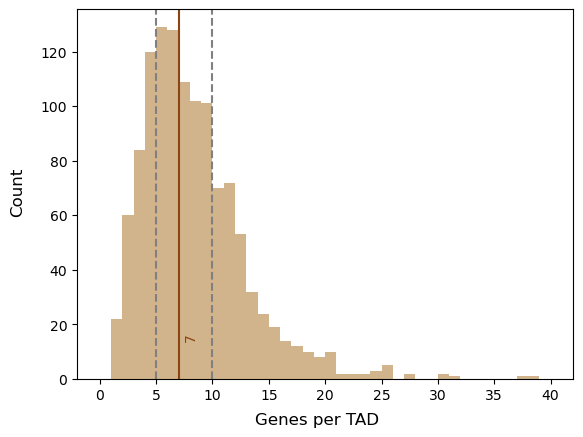

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Read in the BED file
bed_file = np.genfromtxt('number_genes_per_5kb_two_tad.bed', dtype=int)

# Get the 4th column (0-indexed)
column_4 = bed_file[:, 3]

#sns.set(style="whitegrid") 

fig, ax = plt.subplots(nrows=1, ncols=1)

ax=plt.subplot(1, 1, 1,)
plt.hist(column_4, bins=40, range=[0,40], color='tan')
#plt.title('HiCExplorer TADs size distribution', size=14)
plt.axvline(x=7, color='saddlebrown')
plt.text(7.5, 15, "7", rotation=90, color='saddlebrown', size=10)
#plt.text(25000, 12, "22000", rotation=90, color='gray', size=10)
#plt.text(107000, 12, "104000", rotation=90, color='gray', size=10)
plt.axvline(x=5, color='gray', linestyle='--')
plt.axvline(x=10, color='gray', linestyle='--')
#plt.axvline(x=104000, color='gray', linestyle='--')
#plt.axvline(x=1614000, color='gray', linestyle='--')

fig.supylabel('Count',size=12)
fig.supxlabel('Genes per TAD',size=12)
plt.savefig('/scratch/ak8725/figs/fig2H.pdf')
plt.show()